# **CHAT WITH LANGCHAIN** [Playground](https://chat.langchain.com/)

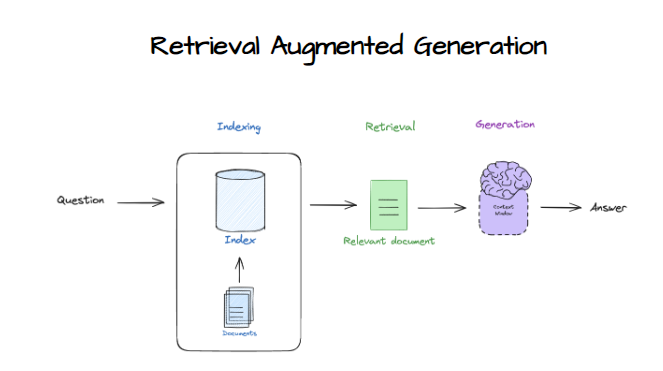

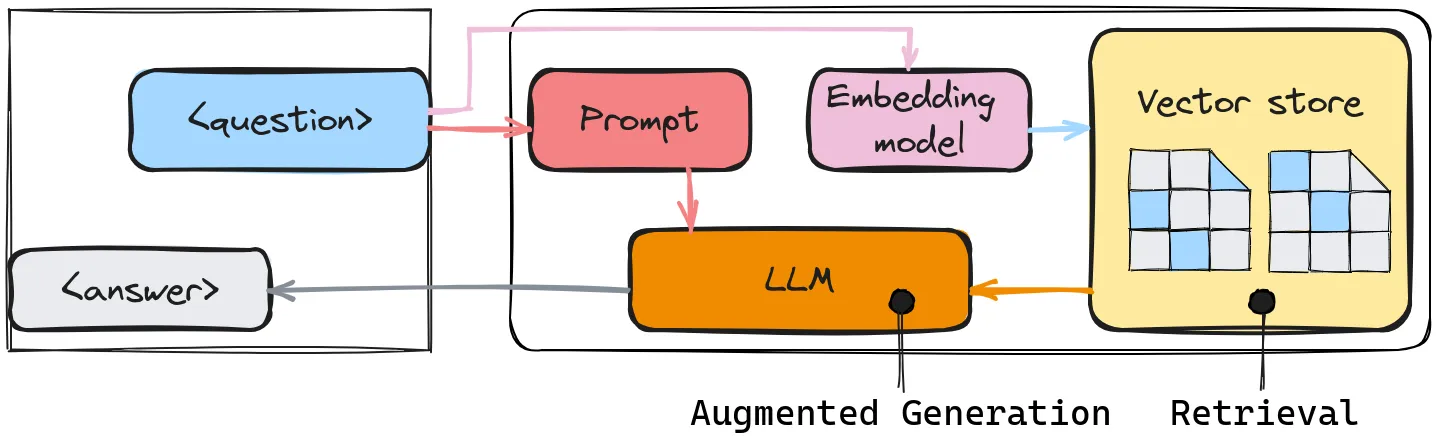

# **RAG - Retrieval Augmented Generation**

  **Basic Architecture**

  1.   Indexing
  2.   Retriever
  3. Generation


1. Document Loading
2. Document Splitting
3. Document Embedding
4. Vector Store
5. Retriever
6. Prompt
7. LLM Models
8. Chains


# **INDEXING**



Step 1.   Document Loaders

Step 2.   Document Splitting

Step 3. Embedding

Step 4. Vector Store

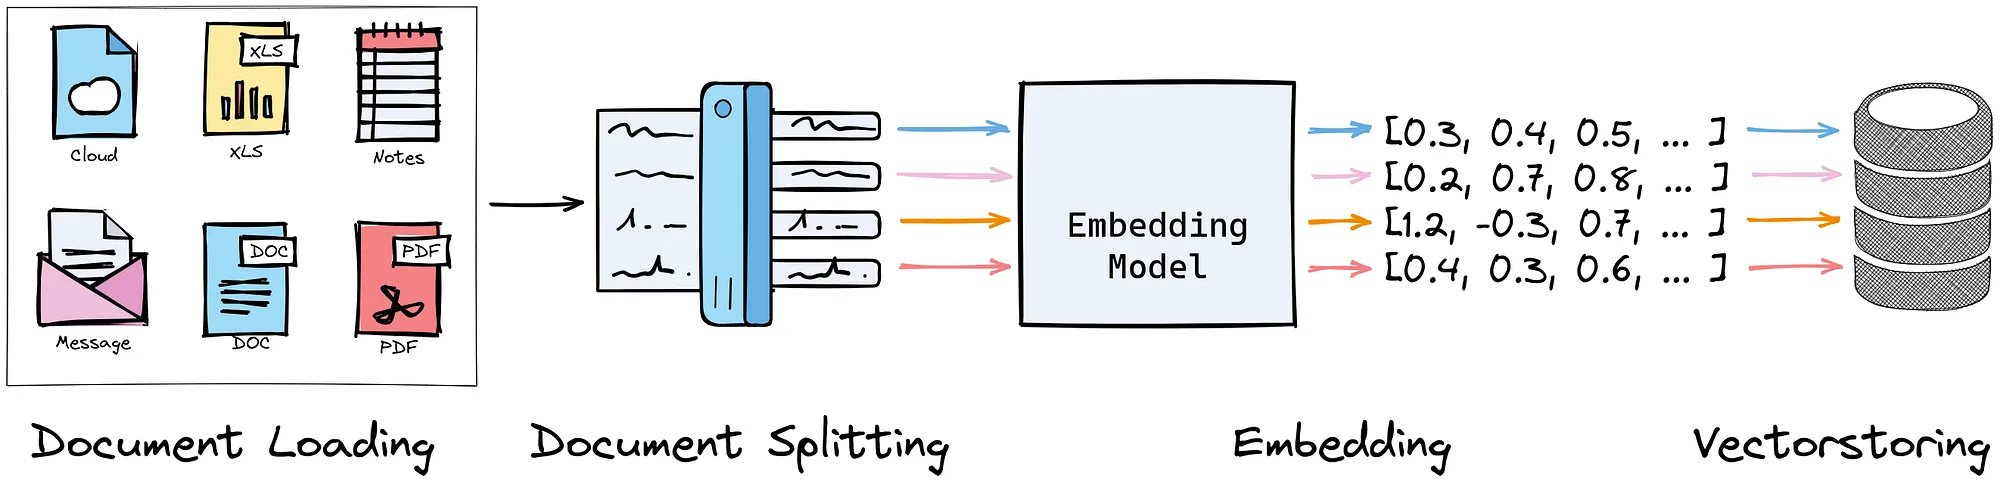


---

## **📄 1. Document Loaders 📥**  

Alex returned to the library the next day, fascinated by how RAGU 🤖 had helped him. As he sipped his coffee ☕ near the kiosk, he noticed the head librarian, Ms. Chen, working with RAGU's maintenance panel 🛠️.  

"Excuse me," Alex said, approaching her. "I'm curious about how RAGU works. How does it get all that information in the first place? 🤔"  

Ms. Chen smiled 😊. "That's a great question! What you're asking about is what we call **'Document Loading'** 📂. It's the very first step in making RAGU helpful. Let me show you."  

---

### **📚 The Great Collection 📖**  

"Document Loading is like the library's acquisition process 🏛️," Ms. Chen explained. "Before any book 📕 can help a student 🎓, it needs to be acquired, cataloged, and placed on our shelves. RAGU works the same way! 🔄"  

She showed Alex three main types of documents 📑 RAGU could process:  

---

### **PDF Document Loader** [langchain Doc Link](https://python.langchain.com/v0.2/docs/integrations/document_loaders/pypdfloader/)

"Most academic literature comes as PDFs 📄," Ms. Chen explained. "Think of all those research papers 📑, textbooks 📖, and journals 📰. When we add new material to RAGU's knowledge base 🧠, special software 🖥️ reads these PDFs—extracting all the text 📝, preserving the formatting when important, and even understanding figures 📊 and tables 📋."

---

In [ ]:
%pip install -qU pypdf langchain-community

In [ ]:
from langchain_community.document_loaders import PyPDFLoader # import the necessary class

loader = PyPDFLoader("/content/DeepSeekR1.pdf") # Change this to the path to your own PDF
pdfdocs = loader.load()

In [ ]:
pdfdocs

[Document(metadata={'producer': 'pdfTeX-1.40.25', 'creator': 'LaTeX with hyperref', 'creationdate': '2025-01-23T01:45:31+00:00', 'author': '', 'keywords': '', 'moddate': '2025-01-23T01:45:31+00:00', 'ptex.fullbanner': 'This is pdfTeX, Version 3.141592653-2.6-1.40.25 (TeX Live 2023) kpathsea version 6.3.5', 'subject': '', 'title': '', 'trapped': '/False', 'source': '/content/DeepSeekR1.pdf', 'total_pages': 22, 'page': 0, 'page_label': '1'}, page_content='DeepSeek-R1: Incentivizing Reasoning Capability in LLMs via\nReinforcement Learning\nDeepSeek-AI\nresearch@deepseek.com\nAbstract\nWe introduce our first-generation reasoning models, DeepSeek-R1-Zero and DeepSeek-R1.\nDeepSeek-R1-Zero, a model trained via large-scale reinforcement learning (RL) without super-\nvised fine-tuning (SFT) as a preliminary step, demonstrates remarkable reasoning capabilities.\nThrough RL, DeepSeek-R1-Zero naturally emerges with numerous powerful and intriguing\nreasoning behaviors. However, it encounters chal

### **Wikipedia loader** [Doc Link](https://python.langchain.com/v0.2/docs/integrations/document_loaders/wikipedia/)

"And then there's Wikipedia 🌐," Ms. Chen continued. "While we always encourage students to go beyond Wikipedia, it's an excellent starting point for background information. 🧐"

She showed Alex how RAGU 🤖 could connect to Wikipedia's (though she called it a "special access point" 🚪) to download articles 📜, process their structure 📂, and incorporate that information into its knowledge base 🧠.

In [ ]:
%pip install --upgrade --quiet  wikipedia

  Preparing metadata (setup.py) ... done


In [ ]:
from langchain_community.document_loaders import WikipediaLoader

In [ ]:
loader = WikipediaLoader(query="IIT Bombay", load_max_docs=1,doc_content_chars_max = 2000) # query any wikipedia page by giving query value
wikidocs = loader.load()

# wikidocs = []
# content = []
# #remove duplucate docs
# for doc in docs:
#   if doc not in wikidocs:
#     wikidocs.append(doc)
# len(wikidocs)

In [ ]:
wikidocs[0].page_content

'The Indian Institute of Technology Bombay (IIT- Bombay or IIT-B) is a public research university and technical institute in Powai, Mumbai, Maharashtra, India.\nIIT Bombay is known for two- or three-year Master of Technology (M.Tech.), the four-year Bachelor of Science (B.S.), the two-year Master of Science (M.Sc.) and the five-year Inter-Disciplinary Dual-Degree Programme (IDDDP) among many others. It also has a comprehensive graduate program offering doctoral degrees in science, technology, engineering and mathematics. It currently has a total of 15 academic departments, 20 additional education centres, a school of excellence and four interdisciplinary programmes including a management programme and industrial design programmes.\nEstablished in 1958, IIT Bombay consistently ranks among the top engineering colleges globally.\n\n\n== History ==\n\nIIT Bombay was the second Indian Institute of Technology to be established in 1958 with assistance from UNESCO and with funds endowed by the

## **2. Document Splitting: Breaking Knowledge into Digestible Pieces** [Doc](https://python.langchain.com/v0.1/docs/modules/data_connection/document_transformers/)

After learning about how RAGU 🤖 collected information, Alex returned to the library 📖 the next afternoon with more questions. He found Ms. Chen organizing a cart of books 📚.

"I've been thinking about how RAGU works," Alex said. "If it loads entire books 📕 and research papers 📑, how does it find just the relevant parts when I ask a question? 🤔 It seems like searching through everything would take forever. ⏳"

Ms. Chen smiled 😊. "That's an excellent insight, Alex! You've just touched on the next critical step in RAGU's process: Document Splitting ✂️."

---

**🎨 The Art of Breaking Things Down ✂️**

"Imagine you're trying to find information about photosynthesis 🌱," Ms. Chen began, picking up a massive biology textbook 📖 from her cart. "Would you read the entire 800-page textbook? 📚 Or would you check the index 📑, find the relevant chapter, and focus there?"

Alex nodded. "I'd go straight to the relevant section. 🎯"

"RAGU does the same thing, but it needs to prepare for this in advance. That's what Document Splitting is all about," Ms. Chen explained. "When RAGU loads a document, it doesn’t keep it whole—it breaks it down into smaller, manageable pieces we call 'chunks' 🧩."

She opened her tablet 📲 and pulled up a visualization 📊 of the process.

---

There are two different axes along which you can customize your text splitter:

1. How the text is split
2. How the chunk size is measured

### **🔡 Split By Character**  

**"The simplest approach is what we call *'Split By Character'*,**" Ms. Chen explained. **"Imagine taking scissors ✂️ to a book 📖 and cutting it every 1,000 characters or so."**  

She showed Alex a **visualization 📊** where a long document was being divided into equal-sized segments 📏.  

**"This method is straightforward—we just count characters 🔢 and make a cut when we reach a certain number. It's like dividing a long novel 📚 into equal-sized chapters regardless of what's happening in the story."**  

Alex frowned 🤔. **"But wouldn't that sometimes cut right in the middle of an important concept?"**  

**"Exactly the problem! 🚨"** Ms. Chen said. **"That's why this basic approach has limitations. It might split right in the middle of an explanation about *CRISPR technology 🧬*, making each piece less meaningful on its own."**  

---  

This is the simplest method. This splits based on characters (by default "\n\n") and measure chunk length by number of characters.

1. How the text is split: by single character.
2. How the chunk size is measured: by number of characters.

In [ ]:
%pip install -qU langchain-text-splitters

In [ ]:
from langchain_text_splitters import CharacterTextSplitter

text_splitter = CharacterTextSplitter(
    separator="\n",
    chunk_size=500,
    chunk_overlap=20,
    length_function=len,
    is_separator_regex=False,
)

In [ ]:
char_split_text = text_splitter.split_documents(wikidocs)
print(char_split_text[0])

page_content='The Indian Institute of Technology Bombay (IIT- Bombay or IIT-B) is a public research university and technical institute in Powai, Mumbai, Maharashtra, India.' metadata={'title': 'IIT Bombay', 'summary': 'The Indian Institute of Technology Bombay (IIT- Bombay or IIT-B) is a public research university and technical institute in Powai, Mumbai, Maharashtra, India.\nIIT Bombay is known for two- or three-year Master of Technology (M.Tech.), the four-year Bachelor of Science (B.S.), the two-year Master of Science (M.Sc.) and the five-year Inter-Disciplinary Dual-Degree Programme (IDDDP) among many others. It also has a comprehensive graduate program offering doctoral degrees in science, technology, engineering and mathematics. It currently has a total of 15 academic departments, 20 additional education centres, a school of excellence and four interdisciplinary programmes including a management programme and industrial design programmes.\nEstablished in 1958, IIT Bombay consiste

### **🔁 Recursively Split By Character**  

**"A more intelligent approach is what we call *'Recursively Split By Character'*,"** Ms. Chen continued, showing a **new visualization 📊**. **"Instead of making blind cuts ✂️, RAGU tries to be smarter about where to break the document."**  

She showed how RAGU would first look for **natural boundaries** like:  

✅ **Chapter breaks 📖**  
✅ **Section headings 🏷️**  
✅ **Paragraph breaks 📝**  

**"It's like if you were asked to divide a textbook 📚 into smaller parts. You wouldn’t cut in the middle of a paragraph. You’d try to break at chapter boundaries first. If the chapters were still too big, you’d look for section breaks within chapters, and so on."**  

Alex watched as the visualization showed a document being **split hierarchically**:  

🔹 **First dividing by chapters 📕**  
🔹 **Then dividing large chapters by sections 📑**  
🔹 **Then dividing large sections by subsections 📂**  
🔹 **Finally dividing by paragraphs if needed ✍️**  

**"This preserves more context and natural flow,"** Ms. Chen explained. **"RAGU respects the author's organization of ideas. 🎯"**  

---  

This text splitter is the recommended one for generic text. It is parameterized by a list of characters. It tries to split on them in order until the chunks are small enough. **The default list is ["\n\n", "\n", " ", ""]**

Let's Install the dependency

In [ ]:
%pip install -qU langchain-text-splitters

In [ ]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

In [ ]:
text_splitter = RecursiveCharacterTextSplitter(
    # Set a really small chunk size, just to show.
    chunk_size=250,
    chunk_overlap=20,
    length_function=len,
    is_separator_regex=False,
)

In [ ]:
Rec_split_docs = text_splitter.split_documents(wikidocs)
print(Rec_split_docs[0])
print(Rec_split_docs[1].page_content)

**Check the chunks length and it split the text by counting characters but as word**

In [ ]:
print([len(doc.page_content) for doc in Rec_split_docs])

### **🤔 Why Splitting Matters**  

**"But why go through all this trouble?"** Alex asked. **"Why not just search the whole document each time?"**  

Ms. Chen nodded appreciatively 😊 at the question. **"Two main reasons."**  

**1️⃣ Efficiency ⚡**  
**"When you ask RAGU 🤖 a question, it can quickly retrieve just the relevant chunks 🧩 rather than processing entire books 📚 or papers 📑. This makes it lightning-fast. ⚡🚀"**  

**2️⃣ Context Management 🧠**  
**"RAGU can only consider a limited amount of information at once. By breaking documents into meaningful chunks 🧩, RAGU can pull just the right pieces together 🔍 to answer your question accurately. 🎯"**  

---  

## **3. Embedding Model** [MTEB](https://huggingface.co/spaces/mteb/leaderboard)
 ---  

### **📏 Document Embedding: The Math Behind Understanding Words**  

**Document embedding** is how **RAGU 🤖 transforms text into numbers 🔢** that computers can understand while preserving meaning. Here’s a simplified explanation:  

### **📝 Text to Numbers Conversion**  
An **embedding model** converts chunks of text into **lists of numbers (vectors) 📊**. For example:  

✅ **"Gene therapy"** → **[0.2, -0.4, 0.7, ...]**  
✅ **"Genetic treatment"** → **[0.25, -0.38, 0.72, ...]**  
❌ **"Motorcycle repair"** → **[-0.6, 0.1, -0.5, ...]**  

---  

### **📍 Meaning as Mathematical Space**  
These **vectors** position text in a **multi-dimensional space 🌌**, where **similar concepts are close together 🔍**.  

✅ **"Gene therapy"** and **"genetic treatment"** would be **neighbors 🏠**  
❌ **"Motorcycle repair"** would be **far away 🏍️**  

---  

### **🧠 Context Matters**  
Modern embedding models **understand context**, not just keywords.  

🔹 **"Bank of the river" 🌊** and **"Bank for savings" 💰** would get **different vectors** despite sharing the word **"bank"**.  

---  

### **🕸️ Neural Networks**  
These **embeddings** come from **sophisticated neural networks 🔗**, trained on **billions of text examples 📚**, learning relationships between concepts.  

---  

### **🔍 Finding Relevant Information**  
When you ask **RAGU 🤖** a question, it:  

1️⃣ **Converts your question into a vector**  
2️⃣ **Finds document chunks 🧩 with vectors closest to your question’s vector**  
3️⃣ **Returns the most relevant information 🎯**  

---  

This is how **RAGU bridges human language 🗣️ and computer mathematics 🔢**, allowing it to **understand concepts and find meaningful connections** between your questions and its knowledge base! 🚀✨  

### **HuggingFace Sentence Transformer Models** [Embedding Doc](https://python.langchain.com/api_reference/huggingface/embeddings/langchain_huggingface.embeddings.huggingface.HuggingFaceEmbeddings.html)

In [ ]:
%pip install --upgrade --quiet  sentence_transformers langchain-huggingface

In [ ]:
from langchain_huggingface import HuggingFaceEmbeddings

model_name = "sentence-transformers/all-mpnet-base-v2"
model_kwargs = {'device': 'cpu'}
encode_kwargs = {'normalize_embeddings': False}
hf_embed = HuggingFaceEmbeddings(
    model_name=model_name,
    model_kwargs=model_kwargs,
    encode_kwargs=encode_kwargs
)

In [ ]:
embedding = hf_embed.embed_query("hi this is harrison")
len(embedding)

### **Google Gemini Embedding Model** [Embedding Doc](https://python.langchain.com/docs/integrations/text_embedding/google_generative_ai/)

In [ ]:
%pip install --upgrade --quiet  langchain-google-genai

In [ ]:
import getpass
import os

if "GOOGLE_API_KEY" not in os.environ:
    os.environ["GOOGLE_API_KEY"] = getpass.getpass("Provide your Google API key here")

In [ ]:
from langchain_google_genai import GoogleGenerativeAIEmbeddings

google_embed = GoogleGenerativeAIEmbeddings(model="models/embedding-001")
vector = google_embed.embed_query("hello, world!")
len(vector)

## **4. 📌 The Vector Database: Alex and the Library of Knowledge**  

This time Alex ask question directly to RAGU

**"Remember those document embeddings 🧩 we talked about?** Those **numerical representations of meaning 🔢?** My **vector database 📂** stores all those embeddings in what we call **'vector space' 🌌**—a mathematical way of organizing information by similarity."  

Alex was starting to get it 🤔. **"So if I ask you about climate change... 🌍"**  

**"Exactly!** I don’t have to **search through every document 📖** in the library. Instead, I **look at the embedding of your question 🎯**, then find the **documents with the most similar embeddings** in my **vector database 📊**. It’s like having a **map 🗺️** where documents with similar meanings are **clustered together 🔍."**  

RAGU showed Alex a **simple visualization 📊** on the screen—a **3D space 🌀** with thousands of tiny dots 🔵, some **clustered together** and others **spread apart**.  

**"Each dot represents a document’s embedding. 🟢🟡🔴** When you ask me something, I **locate your question in this space 📍** and find the **nearest neighbors 🤝—the most relevant information. 📚** This is much faster than searching through text directly! ⚡"**  

**"That's brilliant! 😃"** Alex exclaimed. **"It's like you're not just searching for keywords, but for actual meaning. 🧠"**  

**"Precisely! ✔️** And here’s the best part—my **vector database 📂** can handle **millions of documents 📑** and still return results in **milliseconds ⏱️.** That’s why I seem so quick. Also, when **new research papers or books 📚** enter the library, their **embeddings get added 📥** to my vector database, so my knowledge keeps growing! 🚀"**  

**"So the vector database is essentially your organized memory. 🤖🧠"** Alex summarized.  

**"That’s a perfect way to put it! 🎯"**  

---  

### **FAISS Vector Store**

#### **Method 1**

In [ ]:
!pip install -qU langchain-community faiss-cpu

In [ ]:
from langchain_community.vectorstores import FAISS

faissDB =  FAISS.from_documents(Rec_split_docs, embedding = hf_embed)

# splitted documents embedding created and it is stored in FAISS vector DB

faissDB

In [ ]:
#to save faissdb embeddings
faissDB.save_local("faissdb")

#load faissdb embeddings
faissDB = FAISS.load_local("faissdb", embeddings = hf_embed,allow_dangerous_deserialization=True)

In [ ]:
total_vectors = faissDB.index.ntotal
dimensions = faissDB.index.d

print(f"There are {total_vectors} vectors with {dimensions:,} dimensions in the vector store")

### **InMemory Vector Store**

In [ ]:
from langchain_core.vectorstores import InMemoryVectorStore

vector_store = InMemoryVectorStore.from_documents(Rec_split_docs,embedding= hf_embed)

In [ ]:
vector_store.delete(ids=["3"])

In [ ]:
results = vector_store.similarity_search(query="public research university")
for doc in results:
    print(f"* {doc.page_content} [{doc.metadata}]")



# **Step 5:The Retriever 📖 Alex and the Library of Knowledge**

### *Part 5 of Alex's Journey with RAGU*  

**"RAGU, how do you find exactly what I need so quickly? ⏳"** Alex asked while researching for his **economics presentation 📊**.  

**"I use what’s called a *retriever* 🕵️‍♂️,"** RAGU explained. **"Imagine a skilled librarian 📚👩‍🏫 who knows exactly which shelf to check for any topic. When you ask about *microfinance in Southeast Asia* 💰🌏, my retriever takes your question and searches through my *vector database* 🗄️."**  

**"So it’s like a search engine? 🔍"** Alex wondered.  

**"Similar, but more sophisticated 🧠,"** RAGU replied. **"My retriever doesn’t just look for keywords—it understands the *meaning* behind your question. It evaluates multiple documents 📑 and selects only the most relevant ones 🎯."**  

RAGU displayed **three perfectly matched academic papers 📜📊** on screen.  

**"The retriever is my *bridge 🌉* between your questions and my knowledge 📖,"** RAGU continued. **"It decides which information to pull forward and what to leave behind. ⚖️"**  

**"That explains why your answers are always so on point! 🎯"** Alex nodded, appreciating how this targeted approach saved him **hours of searching ⏰** through irrelevant material.  

---  
Retriever will be created from the Vector databases  

In [ ]:
faiss_retriever = faissDB.as_retriever() # retriever of faissdb embeddings

# **STEP 6. GENERATION**

---

6.1. PROMPT TEMPLATE - Think of giving some detailed information about what Alex want from RAGU

---

6.2. LLM

6.3. CHAINS

## **6.1. Prompt Templates**

### **Import Libraries**

In [ ]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.messages import HumanMessage, SystemMessage

### **Creating a Prompt with Multiple Placeholders**

Usage: This approach is useful for creating more complex prompts that require multiple pieces of variable data.

In [ ]:
template_multiple = """You are a helpful assistant.
Human: Tell me a {adjective} story about a {animal}.
Assistant:"""
prompt_multiple = ChatPromptTemplate.from_template(template_multiple)
prompt = prompt_multiple.invoke({"adjective": "funny", "animal": "panda"})
print("\n----- Prompt with Multiple Placeholders -----\n")
print(prompt)

### **Prompt For Model Inference**

In [ ]:
# create your own template

from langchain_core.prompts import ChatPromptTemplate

template = """Answer the following question based on this context:

{context}

Question: {question}
"""
chatprompt = ChatPromptTemplate.from_template(template)
chatprompt

## **6.2. Loading LLM Models**

There are multiple API providers available to do inferencing

**"Think of the LLM as a *master storyteller* 📖✨ who knows how to weave information into coherent explanations. 🧵🎭"**  

**"My *retriever* 🕵️‍♂️ gathers the *ingredients* 🥦🍅, but my *LLM* 👨‍🍳 cooks the *meal* 🍽️,"** RAGU continued. **"It understands *language patterns 📝, academic concepts 🎓, and how to explain complex ideas clearly 💡."**

### **GOOGLE GEMINI LLM MODEL** [Doc Link](https://python.langchain.com/v0.2/api_reference/google_genai/chat_models/langchain_google_genai.chat_models.ChatGoogleGenerativeAI.html)

In [ ]:
%pip install -qU langchain-google-genai

In [ ]:
import os
from google.colab import userdata

os.environ["GOOGLE_API_KEY"] = userdata.get('GOOGLE_API_KEY') # to get API token https://aistudio.google.com/app/apikey

In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI

googlellm = ChatGoogleGenerativeAI(
    model="gemini-1.5-pro",
    temperature=0,
    max_tokens=None,
    timeout=None,
)

In [ ]:
googlellm.invoke("Hi")

### **GROQ LLM** [Doc Link](https://python.langchain.com/v0.2/docs/integrations/chat/groq/)

Groq is a free API key provider for multiple LLM models and to get the api key go to https://console.groq.com/keys

In [ ]:
!pip install -qU langchain-groq

In [ ]:
from google.colab import userdata
from langchain_groq import ChatGroq

groq_api_key = userdata.get('GROQ_API_KEY') # WE CAN PROVIDE API KEY DIRECTLY ALSO
groqllm = ChatGroq(temperature=0, groq_api_key=groq_api_key, model_name="mixtral-8x7b-32768")


In [ ]:
groqllm.invoke("Talk about MS Dhoni")

## **6.3 CHAINS**


**"RAGU, sometimes you seem to follow a specific process when answering. Why is that? 🤔"** Alex asked.  

**"I use what are called *chains* ⛓️,"** RAGU explained. **"They’re like *assembly lines 🏭* for information processing."**  

RAGU displayed a simple **flowchart 📊** on the screen:  
➡️ **Question ❓ → Retrieval 🔍 → Synthesis 🧠 → Response 💬**  

**"Chains connect all my components in a specific sequence 🔗,"** RAGU continued. **"For *complex questions* 🧩, I might use multiple chains—first gathering *background information* 📖, then finding *specific details* 🔎, and finally crafting a *comprehensive answer* 🎯."**  

---  

In [ ]:
from langchain_core.runnables import RunnablePassthrough # to pass the question to the chain
from langchain_core.output_parsers import StrOutputParser # to parse the output

"""
sample_chain = {
    'context':faiss_retriever,
    'question':RunnablePassthrough(),
}

|chatprompt (to give instructions to the model) | llm (any llm model) | StrOutputParser() (to parse the output)

"""

chain = {'context':faiss_retriever, 'question':RunnablePassthrough()} | chatprompt | groqllm | StrOutputParser()
#question = "Who is Amit Kumar Verma and what are research projects he has ?"
question = 'summarize the content'
ques_output = chain.invoke(question)
ques_output

https://github.com/SetuAI/llm_engineering/blob/main/week5/day4.5.ipynb

In [ ]:
pip install gradio

In [ ]:
# Install necessary packages
!pip install -q langchain langchain_community langchain_text_splitters langchain_groq faiss-cpu gradio transformers sentence-transformers torch pymupdf


In [ ]:

# Import necessary libraries
import os
import gradio as gr
from langchain_community.document_loaders import PyMuPDFLoader
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain_community.embeddings import HuggingFaceEmbeddings
from langchain_community.vectorstores import FAISS
from langchain_core.prompts import ChatPromptTemplate
from langchain_groq import ChatGroq
from langchain_core.runnables import RunnablePassthrough
from langchain_core.output_parsers import StrOutputParser

# Initialize embedding model
def init_embeddings():
    model_name = "sentence-transformers/all-mpnet-base-v2"
    return HuggingFaceEmbeddings(model_name=model_name)

# Process multiple PDFs and create combined vector store
def process_pdfs(pdf_paths, api_key):
    try:
        all_splits = []

        for pdf_path in pdf_paths:
            if not os.path.exists(pdf_path):
                return None, f"❌ File not found: {pdf_path}"

            # Load and split PDF
            loader = PyMuPDFLoader(pdf_path)
            docs = loader.load()

            # Split document
            text_splitter = RecursiveCharacterTextSplitter(
                chunk_size=1500,
                chunk_overlap=300,
                length_function=len
            )
            splits = text_splitter.split_documents(docs)
            all_splits.extend(splits)

        if not all_splits:
            return None, "❌ No valid documents processed!"

        # Create combined vector store
        embeddings = init_embeddings()
        vectorstore = FAISS.from_documents(all_splits, embeddings)

        # Save vector store
        vectorstore.save_local("faiss_index")

        if not api_key or len(api_key) < 20:
            return None, "❌ Invalid Groq API key!"

        # Create chat model
        llm = ChatGroq(
            temperature=0.1,
            groq_api_key=api_key,
            model_name="mixtral-8x7b-32768"
        )

        # Multi-document prompt template
        prompt = ChatPromptTemplate.from_template(
            """Analyze these research papers and answer the question.
            Context from papers:
            {context}

            Question: {question}

            Consider information from all available papers. If conflicting
            information exists, mention this in your answer. Provide
            citations using [Paper#] based on upload order.
            """
        )

        retriever = vectorstore.as_retriever()
        chain = (
            {"context": retriever, "question": RunnablePassthrough()}
            | prompt
            | llm
            | StrOutputParser()
        )

        return chain, f"✅ Processed {len(pdf_paths)} papers successfully!"

    except Exception as e:
        return None, f"❌ Processing error: {str(e)}"

# Handle multiple PDF uploads
def upload_and_process(files, api_key):
    if not files:
        return None, "⚠️ Please upload PDF files!"

    try:
        pdf_paths = []
        for file in files:
            # Save each file
            filename = os.path.basename(file.name)
            pdf_path = f"/content/{filename}"
            with open(pdf_path, "wb") as f:
                with open(file.name, "rb") as uploaded_file:
                    f.write(uploaded_file.read())
            pdf_paths.append(pdf_path)

        return process_pdfs(pdf_paths, api_key)
    except Exception as e:
        return None, f"❌ Upload error: {str(e)}"

# Generate answers
def answer_question(question, chain):
    if not question.strip():
        return "⚠️ Please enter a question."
    if chain is None:
        return "⚠️ Process PDFs first!"

    try:
        return chain.invoke(question)
    except Exception as e:
        return f"❌ Answer error: {str(e)}"

# Create Gradio interface with multi-file support
def create_interface():
    with gr.Blocks(title="Multi-Paper Analyzer") as app:
        gr.Markdown("# 📚 Multi-Paper Research Assistant")

        # Inputs
        api_key = gr.Textbox(label="🔑 Groq API Key", type="password")
        file_upload = gr.File(label="📤 Upload Research Papers (PDF)",
                            file_types=[".pdf"],
                            file_count="multiple")
        process_btn = gr.Button("🚀 Process Papers")
        status = gr.Textbox(label="Status", interactive=False)

        # Hidden state
        chain_state = gr.State()

        # Q&A section
        question = gr.Textbox(label="❓ Cross-Paper Research Question")
        answer_btn = gr.Button("🔍 Analyze Papers")
        answer = gr.Textbox(label="📝 Comprehensive Answer", lines=10)

        # Multi-paper examples
        gr.Examples(
            examples=[
                "What common methodologies are used across these papers?",
                "Compare the findings of Paper 1 and Paper 2",
                "What are the conflicting results in these studies?",
                "Identify key trends across all papers",
                "What future research directions are suggested collectively?",
                "Which papers cite each other?",
                "Summarize the main contributions of each paper"
            ],
            inputs=question
        )

        # Event handlers
        process_btn.click(
            upload_and_process,
            [file_upload, api_key],
            [chain_state, status]
        )

        answer_btn.click(
            answer_question,
            [question, chain_state],
            answer
        )

    return app

# Launch the app
app = create_interface()
app.launch(share=True)